### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-14,443497,4649482,663929,587797,269016,134774,130027,190793,116454,92776,85548,125713,115167,4849,198840
2021-09-15,443928,4659842,666607,588597,269913,134975,130100,191566,116470,92843,85638,125753,115619,4849,198860
2021-09-16,444248,4670256,670000,589246,270348,135134,130167,192340,116511,92906,85739,125782,116072,4849,198891
2021-09-17,444529,4679137,672635,589573,270538,135314,130233,193111,116618,92928,85783,125826,116436,4849,198891
2021-09-18,444838,4685838,673472,590508,270538,135478,130284,193891,116662,92964,85783,125860,116791,4849,198976


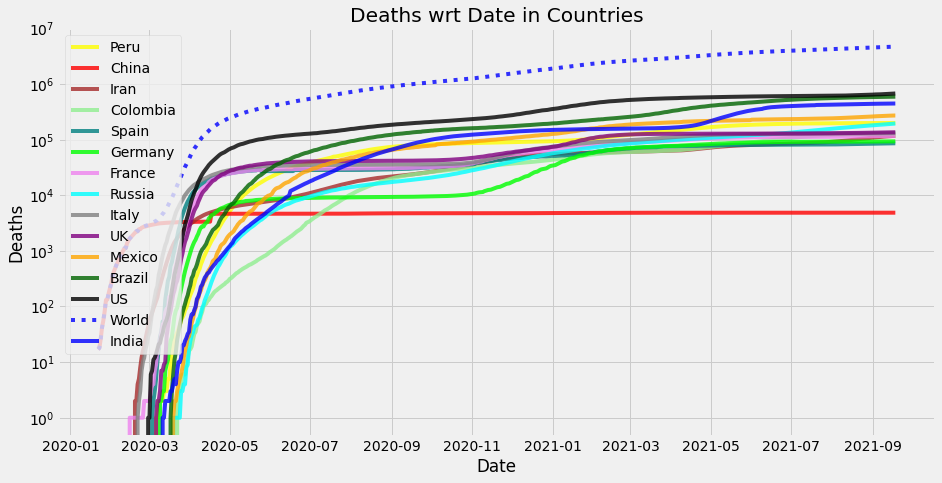

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-14,27176,549167,144334,13406,12929,26763,4009,17529,14456,8840,3261,1435,22329,75,936
2021-09-15,30570,563272,166284,14780,13217,29901,4826,18543,383,13090,3723,1570,19731,81,1018
2021-09-16,34403,577610,157957,34407,7040,26619,5115,19288,14384,11816,4075,1484,18021,84,1068
2021-09-17,35662,593099,207886,11202,3754,32566,4544,19589,7756,9904,3222,1544,17605,49,0
2021-09-18,30773,532986,56849,150106,0,29476,4576,19999,7972,7103,0,1655,12847,71,2039


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-14,35985,589785,146407,20659,13205,33324,5347,18756,13907,8533,7090,2768,27760,45,974
2021-09-15,35624,588017,147732,20267,13206,33096,5313,18742,13005,8837,6866,2688,27225,47,977
2021-09-16,35543,587323,148414,21210,12795,32664,5299,18778,13097,9035,6680,2608,26611,50,983
2021-09-17,35551,587708,152379,20542,12192,32657,5249,18832,12741,9093,6449,2537,26011,50,917
2021-09-18,35232,584060,146010,29180,11379,32445,5204,18910,12423,8961,6019,2478,25133,51,992


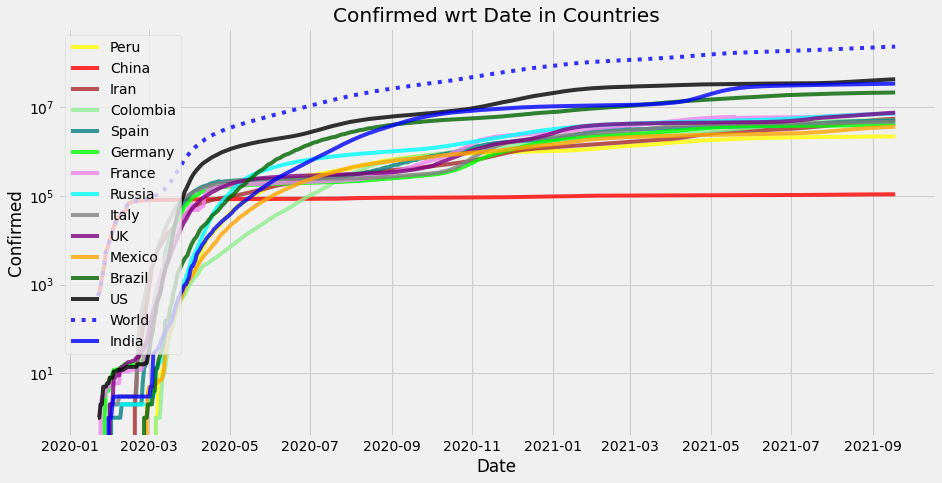

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-14,284,9863,1823,731,1047,187,72,762,209,82,155,26,408,0,41
2021-09-15,431,10360,2678,800,897,201,73,773,16,67,90,40,452,0,20
2021-09-16,320,10414,3393,649,435,159,67,774,41,63,101,29,453,0,31
2021-09-17,281,8881,2635,327,190,180,66,771,107,22,44,44,364,0,0
2021-09-18,309,6701,837,935,0,164,51,780,44,36,0,34,355,0,85


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-14,329.98,9029.44,1550.86,535.18,656.92,126.15,54.80,766.94,113.08,40.89,85.98,56.86,513.63,0.11,42.01
2021-09-15,342.60,9195.76,1691.75,568.28,686.93,135.51,57.08,767.70,100.94,44.16,86.48,54.75,505.93,0.10,39.26
2021-09-16,339.78,9348.04,1904.41,578.37,655.44,138.45,58.32,768.49,93.45,46.51,88.30,51.53,499.31,0.08,38.23
2021-09-17,332.43,9289.66,1995.73,546.95,597.26,143.64,59.28,768.80,95.14,43.45,82.76,50.59,482.40,0.07,33.45
2021-09-18,329.50,8966.07,1850.89,595.46,522.60,146.19,58.24,770.20,88.75,42.52,72.41,48.52,466.47,0.06,39.89


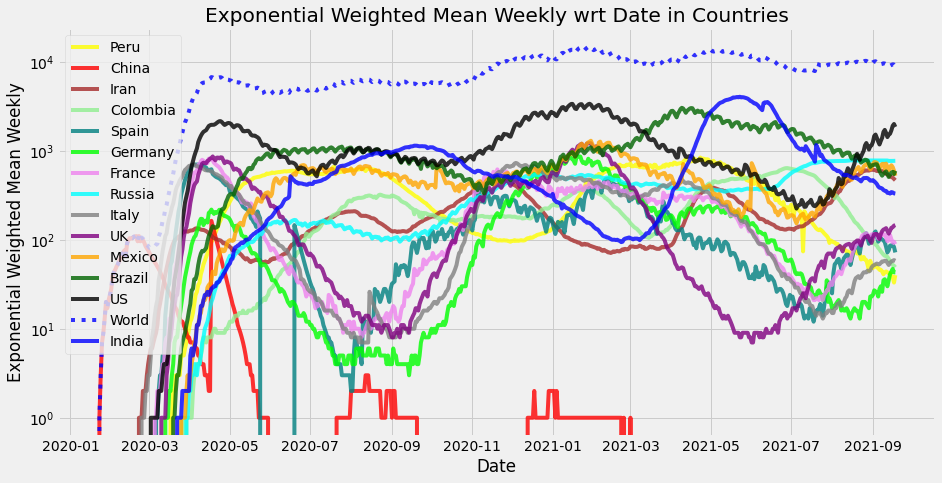

In [18]:
plotter(np.round(AVG), name)

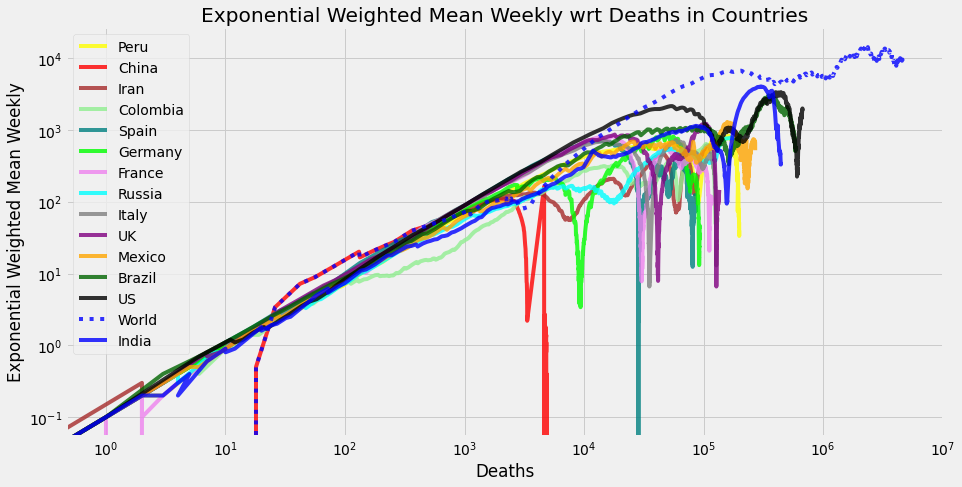

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

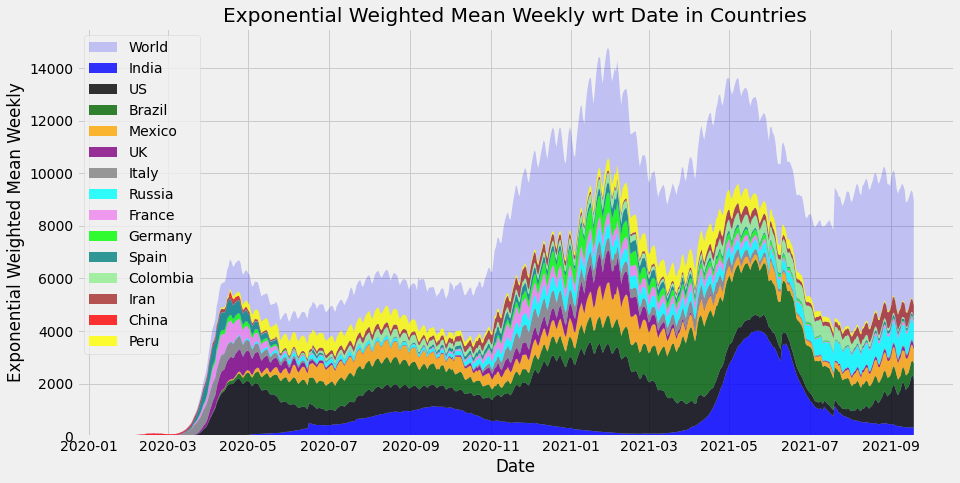

In [20]:
stackplotter(AVG, name)

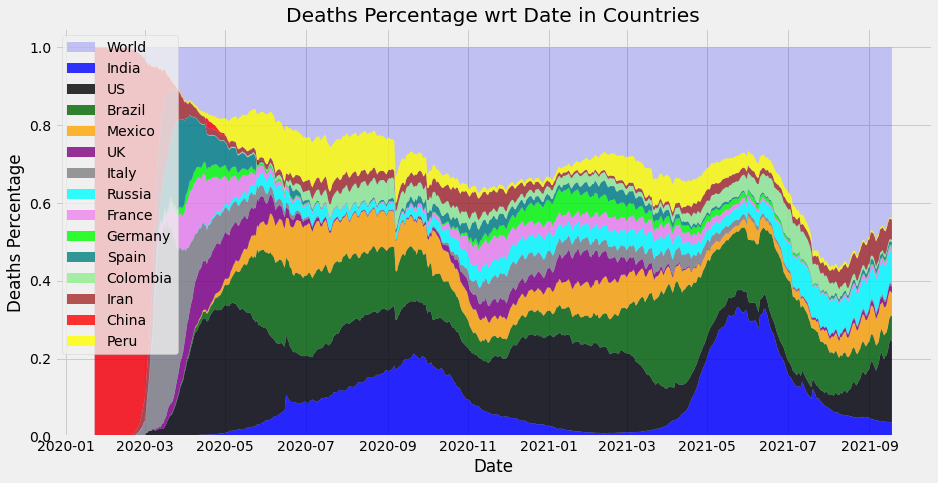

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

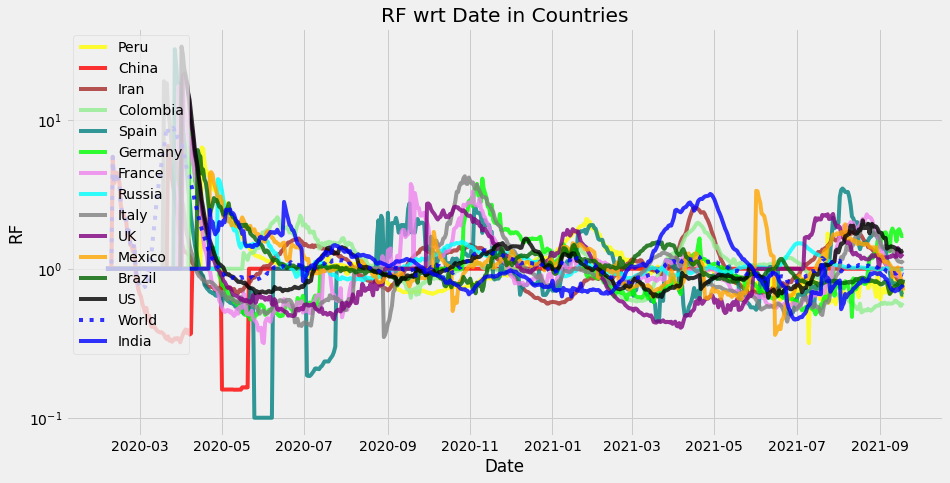

In [23]:
plotter(Reproductivity, 'RF')

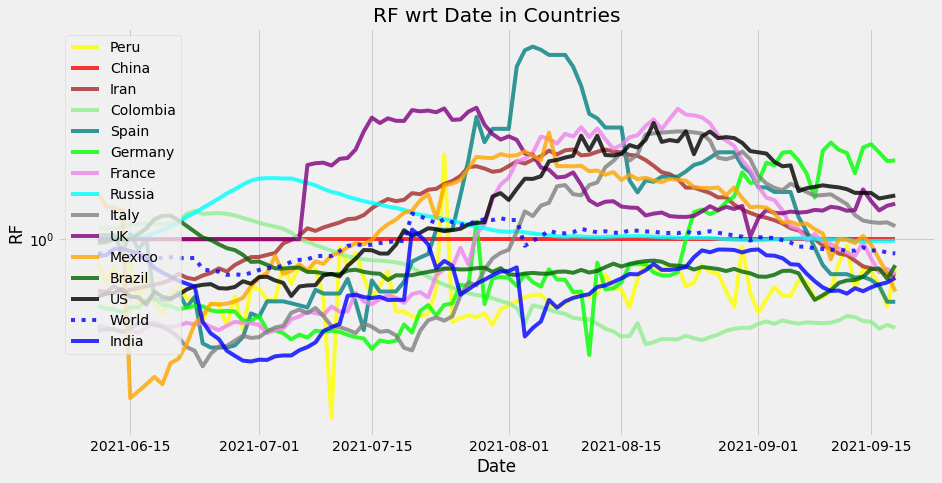

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

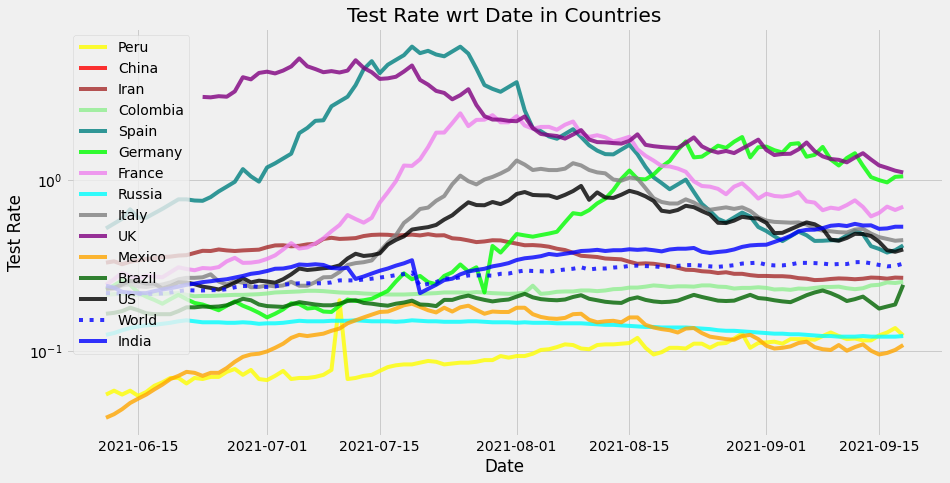

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

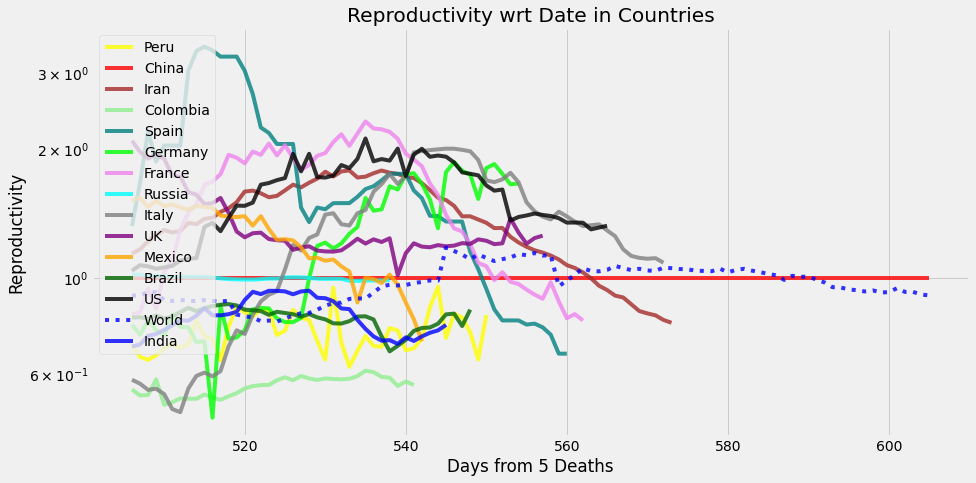

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

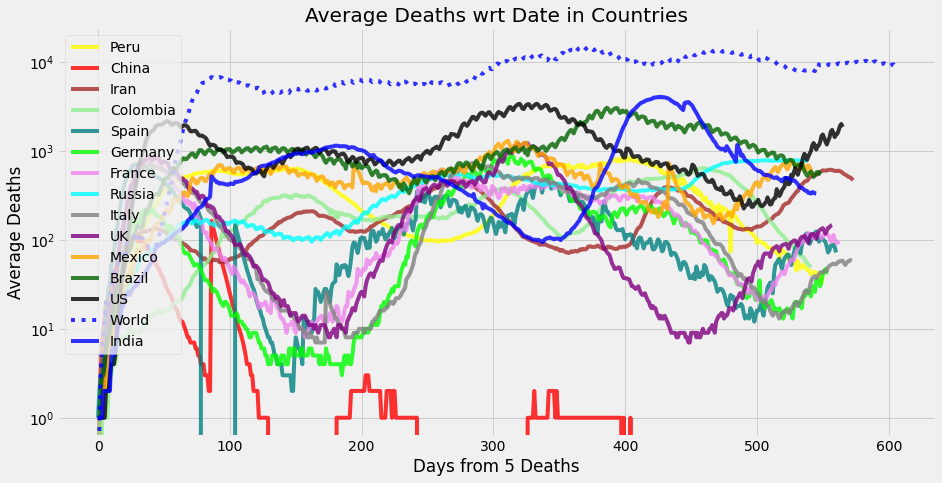

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

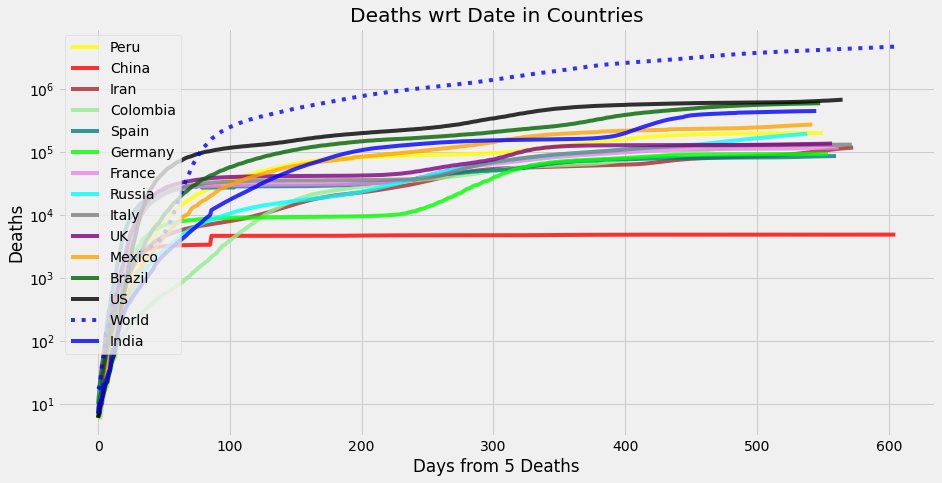

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4685838,6701,8673.14,8966.07,0.9130,228182335,0.326,584060,937.17
US,673472,837,1968.71,1850.89,1.3255,42050638,0.394,146010,134.69
Brazil,590508,935,564.29,595.46,0.8463,21230325,0.245,29180,118.10
India,444838,309,311.86,329.50,0.7800,33448163,0.535,35232,88.97
Mexico,270538,0,430.57,522.60,0.7150,3552983,0.109,11379,54.11
Peru,198976,85,35.43,39.89,0.8223,2166419,0.124,992,39.80
Russia,193891,780,763.57,770.20,0.9912,7150244,0.123,18910,38.78
Indonesia,140323,185,231.71,362.12,0.4660,4188529,0.127,9198,28.06
UK,135478,164,144.14,146.19,1.2574,7435493,1.110,32445,27.10


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4685838,6701,8673.14,8966.07,0.9130,228182335,0.326,584060,937.17
US,673472,837,1968.71,1850.89,1.3255,42050638,0.394,146010,134.69
Russia,193891,780,763.57,770.20,0.9912,7150244,0.123,18910,38.78
Brazil,590508,935,564.29,595.46,0.8463,21230325,0.245,29180,118.10
Mexico,270538,0,430.57,522.60,0.7150,3552983,0.109,11379,54.11
Iran,116791,355,423.86,466.47,0.7890,5408860,0.269,25133,23.36
Malaysia,23067,324,378.29,363.21,1.2694,2082876,0.260,18851,4.61
India,444838,309,311.86,329.50,0.7800,33448163,0.535,35232,88.97
Vietnam,16857,220,262.71,282.29,0.8166,677023,0.200,11317,3.37


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4685838


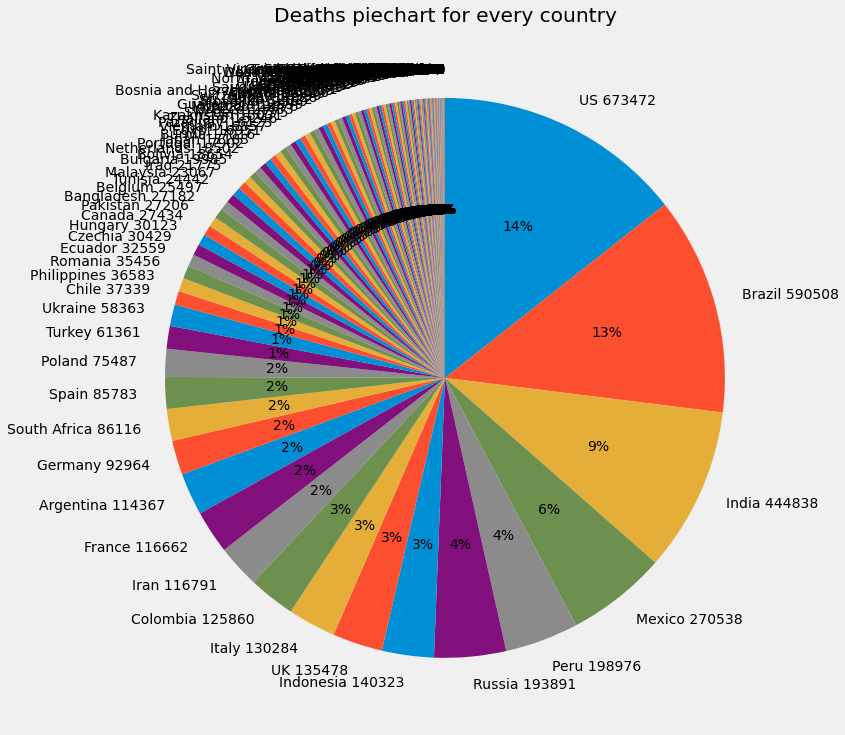

In [35]:
piechart('Deaths')

World total:  8673


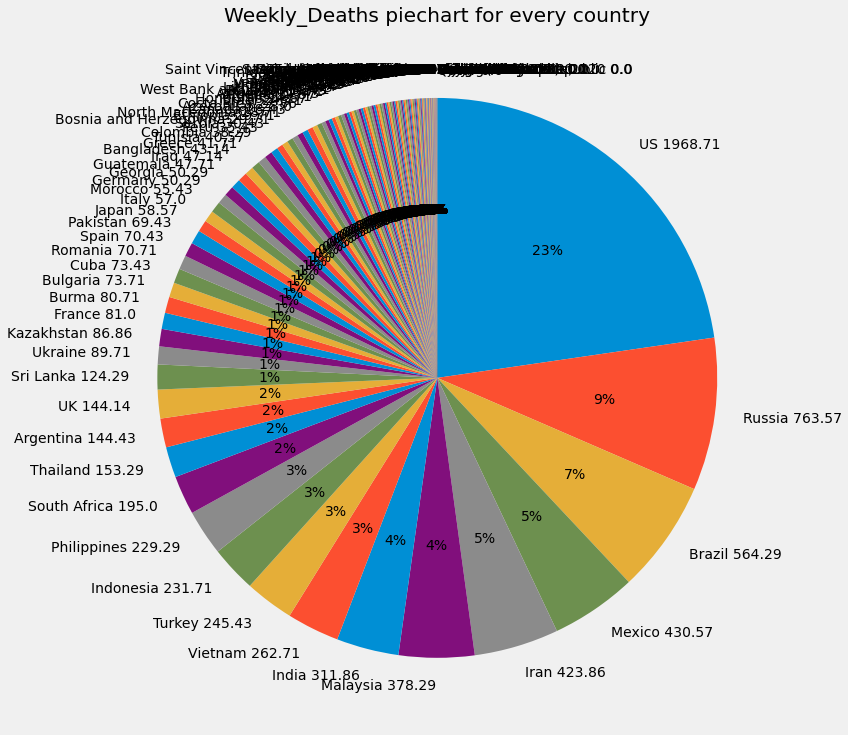

In [36]:
piechart('Weekly_Deaths')

World total:  6701


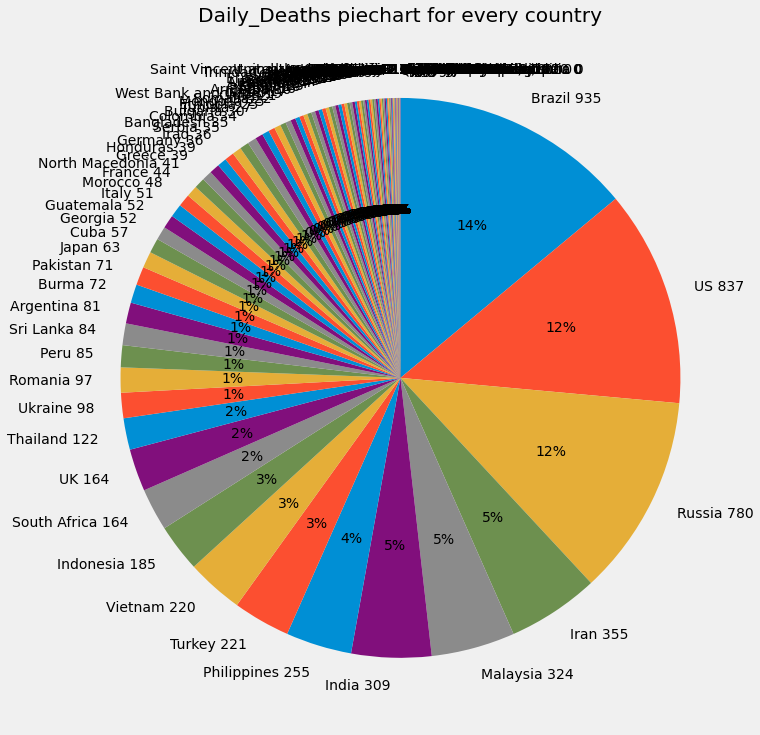

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-09-19


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

937167600.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master b16f530] `date` update
 1 file changed, 2124 insertions(+), 2132 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (67%)


To https://github.com/Arrowheadahp/COVID-19.git
   1cd2dcb..b16f530  master -> master
